# CS4320 Introduction to Machine Learning

## A Template for the Course Project Submssion

Note: This template is optional. You can design your Jupyter Notebook structure based on your competition and preference. However, we expect you practice as many machine learning skills you learned in this course as possible.

**Please type your group name here:**

In [86]:
GroupName = "KraftMacNCheese"
assert GroupName != "", 'Please enter your name in the above quotation marks, thanks!'
KaggleCompetitionLink = "https://www.kaggle.com/competitions/whats-cooking"
assert KaggleCompetitionLink != "", 'Please enter your name in the above quotation marks, thanks!'

## Table of contents
0. [Submission instructions](#si)
1. [Understanding the problem](#1)
2. [Data splitting](#2)
3. [EDA](#3)
4. [Feature engineering](#4)
5. [Preprocessing and transformations](#5) 
6. [Baseline model](#6)
7. [Linear models](#7)
8. [Different models](#8)
9. [Feature selection](#9)
10. [Hyperparameter optimization](#10)
11. [Interpretation and feature importances](#11) 
12. [Results on the test set](#12)
13. [Submit the predictions to Kaggle](#13)
14. [Your takeaway from the course](#14)

## Submission instructions <a name="si"></a>
<hr>

- It's your responsibility to make sure that the assignment is submitted by one of the group members before the deadline. 
- Upload the .ipynb file to Canvas.
- **Submit the screenshot of your Kaggle submission ranking and score** 
- Run all cells in your notebook to make sure there are no errors by doing `Kernel -> Restart Kernel and Clear All Outputs` and then `Run -> Run All Cells`.
- Notebooks with cell execution numbers out of order will have marks deducted. Notebooks without the output displayed may not be graded at all (because we need to see the output in order to grade your work).
- Make sure that the plots and output are rendered properly in your submitted file. 
- Please keep your notebook clean and delete any throwaway code.

## Introduction <a name="in"></a>

A few notes and tips when you work on this project: 

#### Tips
1. The project is open-ended, and while working on it, there might be some situations where you'll have to use your own judgment and make your own decisions (as you would be doing when you work as a data scientist). Make sure you explain your decisions whenever necessary. 
2. **Do not include everything you ever tried in your submission** -- it's fine just to have your final code. That said, your code should be reproducible and well-documented. For example, if you chose your hyperparameters based on some hyperparameter optimization experiment, you should leave in the code for that experiment so that someone else could re-run it and obtain the same hyperparameters, rather than mysteriously just setting the hyperparameters to some (carefully chosen) values in your code. 
3. If you realize that you are repeating a lot of code try to organize it in functions. Clear presentation of your code, experiments, and results is the key to be successful in this lab. You may use code from lecture notes or previous lab solutions with appropriate attributions. 

#### Assessment
We plan to grade fairly and leniently. We don't have some secret target score that you need to achieve to get a good grade. **You'll be assessed on demonstration of mastery of course topics, clear presentation, and the quality of your analysis and results.** For example, if you just have a bunch of code and no text or figures, that's not good. If you do a bunch of sane things and get a lower accuracy than your friend, don't sweat it.

In [87]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import time
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.dummy import DummyClassifier
from sklearn.impute import SimpleImputer
from sklearn.model_selection import cross_val_score, cross_validate, train_test_split, GridSearchCV, StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler, OrdinalEncoder, MultiLabelBinarizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
import csv
from xgboost import XGBClassifier

/kaggle/input/unzipped/train.json
/kaggle/input/unzipped/test.json
/kaggle/input/submissionpng/KaggleFinalSubmission.png
/kaggle/input/whats-cooking/sample_submission.csv.zip
/kaggle/input/whats-cooking/test.json.zip
/kaggle/input/whats-cooking/train.json.zip


<br><br>

<!-- BEGIN QUESTION -->

## 1. Pick your problem and explain the prediction problem <a name="1"></a>
<hr>

**Your tasks:**

1. Spend some time understanding the problem and what each feature means. Write a few sentences on your initial thoughts on the problem and the dataset. 

The problem for the What's Cooking? challenge on Kaggle is classifying a grouping of ingredients to be paired with a specific culinary style. We are presented with a list of inredients that are connected to a culinary style. The action of the challenge is that we need to be able to apply machine learning to the ingredients and train the machine to be able to recognize certain groupings of ingredients and identify the culinary style. The dataset comes with 3 features, an ID, a culinary style, and a list of ingredients. The ID is generally used for scoring, the style is used to train the machine and each of the ingredients are features that help identify the specific culinary style.

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 2. Data splitting <a name="2"></a>
<hr>

**Your tasks:**

1. Split the data into train and test portions.

In [88]:
df = pd.read_json("/kaggle/input/unzipped/train.json")
df_test = pd.read_json("/kaggle/input/unzipped/test.json")

X = df.drop(columns=["cuisine", "id"])
y = df["cuisine"]
test_id = df_test["id"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_submission = df_test.drop(columns=["id"])
print(X_train)
print(y_train)

                                             ingredients
23436  [shredded cheddar cheese, chicken meat, choppe...
7901   [fresh cilantro, purple onion, ground coriande...
25718  [sugar, garlic, onions, vinegar, green chilies...
16909  [raw pistachios, purple onion, couscous, dried...
34830  [tomatoes, pepper, salsa, sliced green onions,...
...                                                  ...
6265   [tomato purée, butter, salt, taco seasoning, p...
11284  [marsala wine, butter, olive oil, fresh mushro...
38158  [blue crabs, peeled fresh ginger, soy sauce, s...
860    [pepper, spicy brown mustard, boneless chicken...
15795  [olive oil, thyme leaves, dried lavender, lemo...

[31819 rows x 1 columns]
23436        mexican
7901          indian
25718       filipino
16909       moroccan
34830        mexican
            ...     
6265         mexican
11284        italian
38158        chinese
860      southern_us
15795         french
Name: cuisine, Length: 31819, dtype: object


<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 3. EDA <a name="3"></a>
<hr>

**Your tasks:**

1. Perform exploratory data analysis on the train set.
3. Include at least two summary statistics and two visualizations that you find useful, and accompany each one with a sentence explaining it.
4. Summarize your initial observations about the data. 

<class 'pandas.core.series.Series'>


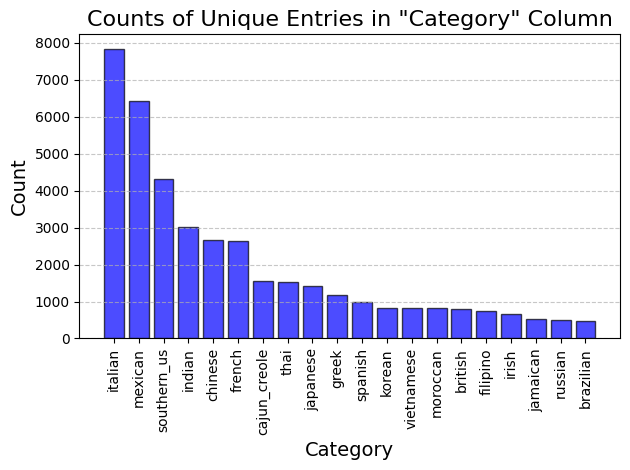

KeyboardInterrupt: 

In [89]:
from collections import Counter

unique_counts = y.value_counts()

# Display the counts
print(type(unique_counts))

plt.bar(unique_counts.index, unique_counts.values, color='blue', edgecolor='black', alpha=0.7)

# Add labels, title, and grid
plt.title('Counts of Unique Entries in "Category" Column', fontsize=16)
plt.xlabel('Category', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=90)

# Show the plot
plt.tight_layout()
plt.show()

import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter

def plot_ingredient_distribution(df):
    """
    Plots the ingredient distribution for each cuisine.

    Parameters:
    - df (pd.DataFrame): DataFrame containing the data.
    - ingredient_column (str): Name of the column with ingredient lists.
    - cuisine_column (str): Name of the column with cuisine types.
    """

    totals = {}

    for index, row in df.iterrows():
        # print(row["cuisine"])
        if row["cuisine"] not in totals:
            totals[row["cuisine"]] = row["ingredients"]
        else:
            totals[row["cuisine"]] = totals[row["cuisine"]] + row["ingredients"]

    for key, value in totals.items():
        counter = Counter(value)

        # Get the 10 most common values (value, frequency) pairs
        most_common = counter.most_common(20)
        
        # Separate the values and their counts
        values, counts = zip(*most_common)
        
        # Plot the histogram of the top 10 most frequent values
        plt.bar(values, counts, color='blue', edgecolor='black')
        
        # Add labels and title
        plt.xlabel('Value')
        plt.ylabel('Frequency')
        plt.title(key)
        plt.xticks(rotation=90)
        
        # Show the plot
        plt.show()


# Plot ingredient distribution for each cuisine
plot_ingredient_distribution(df)

# Calculate the number of ingredients for each recipe
df["num_ingredients"] = df["ingredients"].apply(len)
stats = df.groupby("cuisine")["num_ingredients"].agg(["mean", "median"])
stats.rename(columns={"mean": "Average Ingredients", "median": "Median Ingredients"}, inplace=True)
print(stats)

# Visualize the count
stats.plot(kind="bar", figsize=(12, 6), color=["skyblue", "orange"], edgecolor="black", alpha=0.8)
plt.title("Average and Median Number of Ingredients per Cuisine", fontsize=16)
plt.xlabel("Cuisine", fontsize=14)
plt.ylabel("Number of Ingredients", fontsize=14)
plt.xticks(rotation=90)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.legend(["Average", "Median"], fontsize=12)
plt.tight_layout()
plt.show()

1. We performed data analysis on the training set by getting unique counts and plotting that information
2. Our two summary statistics:
    - The counts of each ingredient for each cuisine is counted and displayed in a bar graph to highlight the 20 most common ingredients for our data set. This allows us to be able to drop columns that are common between all cuisines and to focus on the details that we find the most important.
    - The average number of ingredients for each cuisine was counted and also represented as a bar graph. This graph shows us which cuisines utilize more ingredients which helps us identify that if a dish were to be tested and have a lot of ingredients we could utilize that to identify what the cuisine is.
3. Our inital observations are that each cuisine have unique ingredients that are prominent in their dishes. But that they also have some shared ingredients such as salt. By looking at this information we can drop salt from the list of ingredients because it is shared between everything. We were also able to observe that their are a lot more entries for italian, and mexican food than other cultures and that our data will be swayed towards those options. It is necessary to make sure our models can successfully pick out the different ingredients for each cuisine so that it is not all return as italian and mexican. We also learned that most cuisines utilize similar amounts of ingredients and that the number of ingredients may not be a valuable attribute to help determine the cuisine for the list of ingredients.

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 4. Feature engineering <a name="4"></a>
<hr>

**Your tasks:**

1. Carry out feature engineering. In other words, extract new features relevant for the problem and work with your new feature set. You may have to go back and forth between feature engineering and preprocessing. Briefly explain why you come up with these new features.

In [ ]:
ingredient_mapping = {
    # Milk and Dairy Variants
    "whole milk": "milk",
    "skim milk": "milk",
    "2% milk": "milk",
    "condensed milk": "milk",
    "evaporated milk": "milk",
    "cream cheese": "cheese",
    "cheddar cheese": "cheese",
    "parmesan cheese": "cheese",
    "mozzarella cheese": "cheese",
    "feta cheese": "cheese",
    "yogurt": "yogurt",
    "plain yogurt": "yogurt",
    "greek yogurt": "yogurt",

    # Butter Variants
    "unsalted butter": "butter",
    "salted butter": "butter",
    "butter oil": "butter",
    "margarine": "butter",

    # Tomato Sauce and Related Variants
    "tomato paste": "tomato sauce",
    "marinara sauce": "tomato sauce",
    "pasta sauce": "tomato sauce",
    "tomato sauce": "tomato sauce",
    "crushed tomatoes": "tomato",
    "diced tomatoes": "tomato",
    "plum tomatoes": "tomato",

    # Sugar Variants
    "white sugar": "sugar",
    "brown sugar": "sugar",
    "granulated sugar": "sugar",
    "confectioners sugar": "sugar",
    "powdered sugar": "sugar",
    "dark brown sugar": "sugar",

    # Oil Variants
    "extra-virgin olive oil": "olive oil",
    "vegetable oil": "oil",
    "canola oil": "oil",
    "peanut oil": "oil",
    "sesame oil": "oil",
    
    # Flour Variants
    "all-purpose flour": "flour",
    "self rising flour": "flour",
    "cake flour": "flour",
    "bread flour": "flour",

    # Vinegar Variants
    "rice vinegar": "vinegar",
    "apple cider vinegar": "vinegar",
    "white vinegar": "vinegar",
    "balsamic vinegar": "vinegar",
    "red wine vinegar": "vinegar",
    
    # Soy Sauce Variants
    "low sodium soy sauce": "soy sauce",
    "light soy sauce": "soy sauce",
    "dark soy sauce": "soy sauce",
}

# Function to map ingredients in each recipe to broader categories
def map_ingredients(ingredients):
    return [ingredient_mapping.get(ing, ing) for ing in ingredients]

# Apply the mapping to the ingredients columns
X_train['ingredients'] = X_train['ingredients'].apply(map_ingredients)
X_test['ingredients'] = X_test['ingredients'].apply(map_ingredients)
X_submission['ingredients'] = X_submission['ingredients'].apply(map_ingredients)
X_train

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 5. Preprocessing and transformations <a name="5"></a>
<hr>

**Your tasks:**

1. Identify different feature types and the transformations you would apply on each feature type. 
2. Define a column transformer, if necessary. 

In [ ]:
mlb = MultiLabelBinarizer(sparse_output=True)

def remove_salt(ingredients):
    return [ingredient for ingredient in ingredients if ingredient != 'salt']

# Apply the function to the ingredients column
X_train['ingredients'] = X_train['ingredients'].apply(remove_salt)
X_test['ingredients'] = X_test['ingredients'].apply(remove_salt)
X_submission['ingredients'] = X_submission['ingredients'].apply(remove_salt)

X_train_ingredients = mlb.fit_transform(X_train['ingredients'])
X_test_ingredients = mlb.transform(X_test['ingredients'])
X_submission = mlb.transform(X_submission['ingredients'])
dense_matrix_from_sparse = X_train_ingredients.toarray()

# Convert the dense matrix to a Pandas DataFrame
df = pd.DataFrame(dense_matrix_from_sparse)

# Print the regular Pandas DataFrame
print(df)

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 6. Baseline model <a name="6"></a>
<hr>

**Your tasks:**
1. Try `scikit-learn`'s baseline model and report results.

In [ ]:
baseline_model = DummyClassifier(random_state=42)

baseline_model.fit(X_train_ingredients, y_train)

# Make predictions on the test set
y_pred = baseline_model.predict(X_test_ingredients)

# Evaluate the model
scores = cross_val_score(baseline_model, X_train_ingredients, y_train, cv=10, scoring='accuracy')

print("Decision Tree Accuracy:", scores.mean())
accuracy = accuracy_score(y_test, y_pred)
print("test Accuracy: ", accuracy)

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 7. Linear models <a name="7"></a>
<hr>

**Your tasks:**

1. Try a linear model as a first real attempt. 
2. Carry out hyperparameter tuning to explore different values for the complexity hyperparameter. 
3. Report cross-validation scores along with standard deviation. 
4. Summarize your results.

In [ ]:
linear_model = LogisticRegression(max_iter=1000, random_state=42)

# Fit the model to the training data
linear_model.fit(X_train_ingredients, y_train)

# Make predictions on the test set
y_pred = linear_model.predict(X_test_ingredients)

# Evaluate the model
scores = cross_val_score(linear_model, X_train_ingredients, y_train, cv=5, scoring='accuracy')

print("Decision Tree Accuracy:", scores.mean())
accuracy = accuracy_score(y_test, y_pred)
print("test Accuracy: ", accuracy)


_Type your answer here, replacing this text._

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 8. Different models <a name="8"></a>
<hr>

**Your tasks:**
1. Try other models aside from a linear model. One of these models should be a tree-based ensemble model. 
2. Summarize your results in terms of overfitting/underfitting and fit and score times. Can you beat a linear model? 

In [ ]:
# Decision Tree

dt_model = DecisionTreeClassifier(random_state=42)

dt_model.fit(X_train_ingredients, y_train)

y_pred = dt_model.predict(X_test_ingredients)

# Evaluate the model
scores = cross_val_score(dt_model, X_train_ingredients, y_train, cv=5, scoring='accuracy')

print("Decision Tree Accuracy:", scores.mean())
accuracy = accuracy_score(y_test, y_pred)
print("test Accuracy: ", accuracy)

In [ ]:
# Random Forest

rf_model = RandomForestClassifier(random_state=42)

rf_model.fit(X_train_ingredients, y_train)

y_pred = rf_model.predict(X_test_ingredients)

# Evaluate the model
scores = cross_val_score(rf_model, X_train_ingredients, y_train, cv=5, scoring='accuracy')

print("Decision Tree Accuracy:", scores.mean())

accuracy = accuracy_score(y_test, y_pred)
print("test Accuracy: ", accuracy)

In [ ]:
# K Nearest Neighbors

knn_model = KNeighborsClassifier()

knn_model.fit(X_train_ingredients, y_train)

y_pred = knn_model.predict(X_test_ingredients)

# Evaluate the model
scores = cross_val_score(knn_model, X_train_ingredients, y_train, cv=5, scoring='accuracy')
print("Decision Tree Accuracy:", scores.mean())

accuracy = accuracy_score(y_test, y_pred)
print("test Accuracy: ", accuracy)

In [ ]:
# XGBoost
from sklearn.preprocessing import LabelEncoder

# label_encoder = LabelEncoder()
# y_train_encoded = label_encoder.fit_transform(y_train)
# y_test_encoded = label_encoder.fit_transform(y_test)
xgb_model = XGBClassifier(use_label_encoder=True, eval_metric='mlogloss', random_state=42)

# xgb_model.fit(X_train_ingredients, y_train_encoded)
xgb_model.fit(X_train_ingredients, y_train)


y_pred = xgb_model.predict(X_test_ingredients)


# Evaluate the model

scores = cross_val_score(xgb_model, X_train_ingredients, y_train_encoded, cv=5, scoring='accuracy')
scores = cross_val_score(xgb_model, X_train_ingredients, y_train, cv=5, scoring='accuracy')


print("XGB cv Accuracy:", scores.mean())

# accuracy = accuracy_score(y_test_encoded, y_pred)
accuracy = accuracy_score(y_test, y_pred)

print("test Accuracy:", accuracy)

In [ ]:
from sklearn.preprocessing import LabelEncoder
from catboost import CatBoostClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score

# Encoding the target labels
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.fit_transform(y_test)

# Initialize CatBoostClassifier
catboost_model = CatBoostClassifier(iterations=500, random_state=42)

# Train the model
scores = cross_val_score(catboost_model, X_train_ingredients, y_train_encoded, cv=5, scoring='accuracy', verbose=-1)

# Predict on the test set
y_pred = catboost_model.predict(X_test_ingredients)

# Evaluate the model with cross-validation

print("CatBoost cv Accuracy:", scores.mean())

# Calculate the accuracy on the test set
accuracy = accuracy_score(y_test_encoded, y_pred)
print("Test Accuracy:", accuracy)


_Type your answer here, replacing this text._

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 9. Feature selection <a name="9"></a>
<hr>

**Your tasks:**

Make some attempts to select relevant features. Do the results improve with feature selection? Summarize your results. If you see improvements in the results, keep feature selection in your pipeline. If not, you may abandon it. 

In [ ]:
# Your code here



_Type your answer here, replacing this text._

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 10. Hyperparameter optimization <a name="10"></a>
<hr>

**Your tasks:**

Make some attempts to optimize hyperparameters for the models you've tried and summarize your results. In at least one case you should be optimizing multiple hyperparameters for a single model. You may use `sklearn`'s methods for hyperparameter optimization or fancier Bayesian optimization methods. 
  - [GridSearchCV](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html)   
  - [RandomizedSearchCV](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html)
  - [scikit-optimize](https://github.com/scikit-optimize/scikit-optimize) 

In [ ]:
# log_model = LogisticRegression()

# param_grid = [
#     {'C' : np.logspace(-4,4,10),
#     'solver': ['liblinear','saga'],
#     'max_iter'  : [1000,2500,5000]
# }
# ]
# clf = GridSearchCV(log_model,param_grid = param_grid, cv = 3, verbose=3,n_jobs=-1)
# best_clf = clf.fit(X_train_ingredients, y_train)
# best_clf.best_estimator_

# print(f'Accuracy - : {best_clf.score(X_train_ingredients, y_train):.3f}')

In [ ]:
log_model = LogisticRegression(C=2.782559402207126, max_iter=1000, solver='liblinear', random_state=42)
log_model.fit(X_train_ingredients, y_train)


print(f'Accuracy - : {log_model.score(X_train_ingredients, y_train):.3f}')

In [ ]:
y_pred = log_model.predict(X_test_ingredients,)

# Evaluate the model
scores = cross_val_score(log_model, X_train_ingredients, y_train, cv=5, scoring='accuracy')

print("Decision Tree Accuracy:", scores.mean())

accuracy = accuracy_score(y_test, y_pred)
print("test Accuracy: ", accuracy)

In [ ]:
# # Your code here
# param_grid = {
#     'n_estimators': [50, 100, 200],             # Number of trees in the forest
#     'max_depth': [1, 10, 20, 30],            # Maximum depth of the trees
# }

# # Perform GridSearchCV for hyperparameter optimization
# grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
# grid_search.fit(X_train_ingredients, y_train)
# rf_model.fit(X_train_ingredients, y_train)

# # Retrieve the best model from GridSearchCV
# best_model = grid_search.best_estimator_

# y_pred = best_model.predict(X_test_ingredients)

# # Evaluate the model
# scores = cross_val_score(best_model, X_train_ingredients, y_train, cv=5, scoring='accuracy')

# print("Decision Tree Accuracy:", scores.mean())

# accuracy = accuracy_score(y_test, y_pred)
# print("test Accuracy: ", accuracy)

_Type your answer here, replacing this text._

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 11. Interpretation and feature importances <a name="11"></a>
<hr>

**Your tasks:**

1. Use the methods we saw in class (e.g., `eli5`, `shap`) (or any other methods of your choice) to examine the most important features of one of the non-linear models. 
2. Summarize your observations. 

In [ ]:
# # Your code here
# import shap

# explainer = shap.TreeExplainer(dt_model)

# # Compute SHAP values
# shap_values = explainer.shap_values(X_test_ingredients)

# # 1. Summary Plot: Shows feature importance and distribution of SHAP values
# shap.summary_plot(shap_values[0], X_test_ingredients)

# # 2. Force Plot: Explains a single prediction
# shap.initjs()  # Initialize JavaScript visualization for Force plot
# shap.force_plot(shap_values[0][0], X_test_ingredients[0])

# # 3. Decision Plot: Visualizes how each feature affects the prediction along the decision path
# shap.decision_plot(shap_values[0], X_test_ingredients)

_Type your answer here, replacing this text._

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 12. Results on the test set <a name="12"></a>
<hr>

**Your tasks:**

1. Try your best performing model on the test data (from train test split) and report test scores. 
2. Do the test scores agree with the validation scores from before? To what extent do you trust your results? Do you think you've had issues with optimization bias? 
3. Take one or two test predictions and explain these individual predictions (e.g., with SHAP force plots).  

In [ ]:
# Your code here


_Type your answer here, replacing this text._

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 13. Submit the predictions to Kaggle <a name="13"></a>
<hr>

**Your tasks:**

Retrain the best model on the whole training dataset and upload the predicted output on the test set to Kaggle. Report your final test score.

In [ ]:
# Your code here
from sklearn.metrics import accuracy_score

results = log_model.predict(X_submission)
results_df = pd.DataFrame({
    'cuisine': results
})
data = test_id.to_frame()
data['cuisine'] = results_df['cuisine']
print(data)

In [ ]:
filename = 'submission.csv'

data.to_csv(filename, index=False)

![image](/KaggleFinalSubmission.png)

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 14. Your takeaway <a name="14"></a>
<hr>

**Your tasks:**

What is your biggest takeaway from the supervised machine learning material we have learned so far? Please write thoughtful answers.  Discuss other ideas that you did not try but could potentially improve the performance/interpretability . 

<!-- END QUESTION -->

<br><br>